In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import string
# Reading in the dataset
letter_p2_df = pd.read_csv('letter-recognition.data',names=['letter','x_box','y_box','width_box','height_box','total_pixel','xbar','ybar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx'])
letter_p2_clean = letter_p2_df['letter'].copy()
for i in range(13):
    letter_p2_clean[letter_p2_clean == string.ascii_uppercase[i]] = 1    
letter_p2_clean[letter_p2_clean != 1] = 0
#Dropping the original letter column in order to add it back at the end
letter_p2_df = letter_p2_df.drop('letter',axis=1)
letter_p2_df['letter'] = letter_p2_clean
letter_p2_df['letter'] = letter_p2_df['letter'].astype(str).astype(int)
letter_p2_df

,x_box,y_box,width_box,height_box,total_pixel,xbar,ybar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,0
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,1
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,0
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,1
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,1
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,0
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,0


In [3]:
# Checking if there are null values in the dataset
letter_p2_df.isnull().values.any()

False

In [4]:
from sklearn.preprocessing import MinMaxScaler
#Scaling Continuous variables
scaler = MinMaxScaler()
letter_p2_scaled_df = letter_p2_df.copy()
letter_p2_scaled_df[['x_box','y_box','width_box','height_box','total_pixel','xbar','ybar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']] = scaler.fit_transform(letter_p2_scaled_df[['x_box','y_box','width_box','height_box','total_pixel','xbar','ybar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']])
letter_p2_scaled_df

,x_box,y_box,width_box,height_box,total_pixel,xbar,ybar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter
0,0.133333,0.533333,0.200000,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333,0
1,0.333333,0.800000,0.200000,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667,1
2,0.266667,0.733333,0.400000,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000,1
3,0.466667,0.733333,0.400000,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333,0
4,0.133333,0.066667,0.200000,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.133333,0.133333,0.200000,0.200000,0.133333,0.466667,0.466667,0.466667,0.400000,0.400000,0.400000,0.266667,0.133333,0.533333,0.200000,0.466667,1
19996,0.466667,0.666667,0.533333,0.533333,0.266667,0.266667,0.533333,0.400000,0.600000,0.800000,0.600000,0.866667,0.133333,0.600000,0.200000,0.466667,1
19997,0.400000,0.600000,0.400000,0.466667,0.333333,0.400000,0.733333,0.200000,0.466667,0.733333,0.600000,0.333333,0.133333,0.800000,0.133333,0.266667,0
19998,0.133333,0.200000,0.266667,0.133333,0.066667,0.533333,0.466667,0.133333,0.400000,0.666667,0.400000,0.533333,0.066667,0.600000,0.333333,0.533333,0


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

lg_accuracy_train = []
lg_roc_auc_train = []
lg_f1_train = []
lg_precision_train = []

lg_accuracy_test = []
lg_roc_auc_test = []
lg_f1_test = []
lg_precision_test = []

lg_Y_pred_list = []
lg_Y_test_list = []

C_val = [1e-8,1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]

# 5 Trials
for i in range(10):
    #Random 5000 per trial
    letter_p2_shuffle_df = letter_p2_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = letter_p2_shuffle_df.iloc[:5000,0:-1],letter_p2_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = letter_p2_shuffle_df.iloc[:5000,-1],letter_p2_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    pipe = Pipeline([('classifier', LogisticRegression())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': C_val},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','sag','newton-cg'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': C_val}
                ]

    # Create grid search 
    clf_lg = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                   verbose=0,n_jobs=-1)

    # Fit grid search
    best_model = clf_lg.fit(X_train, Y_train)
    
    # Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        heat_results = pd.DataFrame( best_model.cv_results_['params'])
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    heat_results['score_acc_'+ str(i+1)] = 1 - best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_precision'])])

    # Creating Logistical Regression based on best parameters
    acc_lg_1 = pipe.set_params(**best_acc_param)
    acc_lg = acc_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('LG_ACC Trial #',i,':',acc_lg.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    lg_accuracy_train.append(acc_lg.score(X_train,Y_train))
    print('LG_ACC Test #',i,':',acc_lg.score(X_test,Y_test)) # Testing Scores
    lg_accuracy_test.append(acc_lg.score(X_test,Y_test))
    
    roc_auc_lg_1 = pipe.set_params(**best_roc_auc_param)
    roc_auc_lg = roc_auc_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('LG_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_lg.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    lg_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_lg.predict_proba(X_train)[:,1]))
    print('LG_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_lg.predict_proba(X_test)[:,1])) # Testing Scores
    lg_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_lg.predict_proba(X_test)[:,1]))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    #Appending each trial together to see the overall ROC curve
    lg_Y_pred_list.append(roc_auc_lg.predict_proba(X_test)[:,1])
    lg_Y_test_list.append(Y_test)
    
    f1_lg_1 = pipe.set_params(**best_f1_param)
    f1_lg = f1_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('LG_F1 Trial #',i,':', f1_score(Y_train,f1_lg.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    lg_f1_train.append(f1_score(Y_train,f1_lg.predict(X_train)))                        
    print('LG_F1 Test #',i,':',f1_score(Y_test,f1_lg.predict(X_test))) # Testing Scores
    lg_f1_test.append(f1_score(Y_test,f1_lg.predict(X_test)))                             
                             
    precision_lg_1 =pipe.set_params(**best_precision_param)
    precision_lg =  precision_lg_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('LG_Precision Trial #',i,':',average_precision_score(Y_train,precision_lg.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    lg_precision_train.append(average_precision_score(Y_train,precision_lg.predict(X_train)))
    print('LG_Precision Test #',i,':',average_precision_score(Y_test,precision_lg.predict(X_test))) # Testing Scores
    lg_precision_test.append(average_precision_score(Y_test,precision_lg.predict(X_test)))             

LG_ACC Trial # 0 : 0.7222
LG_ACC Test # 0 : 0.7266
LG_ROC_AUC_OVR Trial # 0 : 0.814090792570856
LG_ROC_AUC Test # 0 : 0.8127054190678317
LG_F1 Trial # 0 : 0.7147258163894022
LG_F1 Test # 0 : 0.726763941635019
LG_Precision Trial # 0 : 0.5720181272974558
LG_Precision Test # 0 : 0.5849345698300961
LG_ACC Trial # 1 : 0.7374
LG_ACC Test # 1 : 0.7318
LG_ROC_AUC_OVR Trial # 1 : 0.8148715746410797
LG_ROC_AUC Test # 1 : 0.8138853898997555
LG_F1 Trial # 1 : 0.7439048176321436
LG_F1 Test # 1 : 0.7355203471172178
LG_Precision Trial # 1 : 0.6746178161269502
LG_Precision Test # 1 : 0.6635516746348914
LG_ACC Trial # 2 : 0.7256
LG_ACC Test # 2 : 0.729
LG_ROC_AUC_OVR Trial # 2 : 0.8117038312755613
LG_ROC_AUC Test # 2 : 0.8145155154612129
LG_F1 Trial # 2 : 0.7328660436137071
LG_F1 Test # 2 : 0.7316654564657733
LG_Precision Trial # 2 : 0.6673924253332766
LG_Precision Test # 2 : 0.659929587820691
LG_ACC Trial # 3 : 0.7254
LG_ACC Test # 3 : 0.7240666666666666
LG_ROC_AUC_OVR Trial # 3 : 0.8110336994629701
L

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

svm_accuracy_train = []
svm_roc_auc_train = []
svm_f1_train = []
svm_precision_train = []

svm_accuracy_test = []
svm_roc_auc_test = []
svm_f1_test = []
svm_precision_test = []

svm_Y_pred_list = []
svm_Y_test_list = []

C_val_svm = [1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]


for i in range(10):
    #Random 5000 per trial
    letter_p2_shuffle_df = letter_p2_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = letter_p2_shuffle_df.iloc[:5000,0:-1],letter_p2_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = letter_p2_shuffle_df.iloc[:5000,-1],letter_p2_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    svm_pipe = Pipeline([('svm_classifier', SVC())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    svm_search_space = [{'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['poly'],
                 'svm_classifier__degree': [2,3],
                 'svm_classifier__C': C_val_svm},
                {'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['linear'],
                 'svm_classifier__C': C_val_svm},
                {'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['rbf'],
                 'svm_classifier__gamma': [.001,.005,.01,.05,.1,.5,1,2],
                 'svm_classifier__C': C_val_svm}
                ]
        
    # Create grid search 
    clf_svm = GridSearchCV(svm_pipe, svm_search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                   verbose=0,n_jobs=-1)

    # Fit grid search
    svm_best_model = clf_svm.fit(X_train, Y_train)
    
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        svm_heat_results = pd.DataFrame( svm_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    svm_heat_results['score_acc_'+ str(i+1)] = 1 - svm_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = svm_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    svm_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_precision'])])

    # Creating Logistical Regression based on best parameters
    acc_svm_1 = svm_pipe.set_params(**best_acc_param)
    acc_svm = acc_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('SVM_ACC Trial #',i,':',acc_svm.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    svm_accuracy_train.append(acc_svm.score(X_train,Y_train))
    print('SVM_ACC Test #',i,':',acc_svm.score(X_test,Y_test)) # Testing Scores
    svm_accuracy_test.append(acc_svm.score(X_test,Y_test))
    
    roc_auc_svm_1 = svm_pipe.set_params(**best_roc_auc_param)
    roc_auc_svm = roc_auc_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('SVM_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_svm.decision_function(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_svm.decision_function(X_train)))
    print('SVM_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_svm.decision_function(X_test))) # Testing Scores
    svm_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_svm.decision_function(X_test)))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    svm_Y_pred_list.append(roc_auc_svm.decision_function(X_test))
    svm_Y_test_list.append(Y_test)
    
    f1_svm_1 = svm_pipe.set_params(**best_f1_param)
    f1_svm = f1_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('SVM_F1 Trial #',i,':', f1_score(Y_train,f1_svm.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_f1_train.append(f1_score(Y_train,f1_svm.predict(X_train)))                        
    print('SVM_F1 Test #',i,':',f1_score(Y_test,f1_svm.predict(X_test))) # Testing Scores
    svm_f1_test.append(f1_score(Y_test,f1_svm.predict(X_test)))                             
                             
    precision_svm_1 = svm_pipe.set_params(**best_precision_param)
    precision_svm =  precision_svm_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('SVM_Precision Trial #',i,':',average_precision_score(Y_train,precision_svm.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_precision_train.append(average_precision_score(Y_train,precision_svm.predict(X_train)))
    print('SVM_Precision Test #',i,':',average_precision_score(Y_test,precision_svm.predict(X_test))) # Testing Scores
    svm_precision_test.append(average_precision_score(Y_test,precision_svm.predict(X_test)))  

SVM_ACC Trial # 0 : 0.9894
SVM_ACC Test # 0 : 0.9426
SVM_ROC_AUC_OVR Trial # 0 : 0.9988190763407523
SVM_ROC_AUC Test # 0 : 0.9858113872150338
SVM_F1 Trial # 0 : 0.9889514279758183
SVM_F1 Test # 0 : 0.9429461268305613
SVM_Precision Trial # 0 : 0.9828259894493044
SVM_Precision Test # 0 : 0.9177474332430168
SVM_ACC Trial # 1 : 0.9884
SVM_ACC Test # 1 : 0.9448
SVM_ROC_AUC_OVR Trial # 1 : 0.9991291149518635
SVM_ROC_AUC Test # 1 : 0.9853817952956764
SVM_F1 Trial # 1 : 0.9881098810988109
SVM_F1 Test # 1 : 0.9446376036373362
SVM_Precision Trial # 1 : 0.9825617936439067
SVM_Precision Test # 1 : 0.921347239432559
SVM_ACC Trial # 2 : 0.99
SVM_ACC Test # 2 : 0.9425333333333333
SVM_ROC_AUC_OVR Trial # 2 : 0.999196774810858
SVM_ROC_AUC Test # 2 : 0.9865351734831482
SVM_F1 Trial # 2 : 0.9899396378269618
SVM_F1 Test # 2 : 0.9422638981915606
SVM_Precision Trial # 2 : 0.9851806452365128
SVM_Precision Test # 2 : 0.9158631816787336
SVM_ACC Trial # 3 : 0.9908
SVM_ACC Test # 3 : 0.9434
SVM_ROC_AUC_OVR Trial

In [7]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

knn_accuracy_train = []
knn_roc_auc_train = []
knn_f1_train = []
knn_precision_train = []

knn_accuracy_test = []
knn_roc_auc_test = []
knn_f1_test = []
knn_precision_test = []

knn_Y_pred_list = []
knn_Y_test_list = []

K_Vals = np.linspace(1,105,26,dtype=int)
weights_list = ['uniform','distance']

for i in range(10):
    #Random 5000 per trial
    letter_p2_shuffle_df = letter_p2_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = letter_p2_shuffle_df.iloc[:5000,0:-1],letter_p2_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = letter_p2_shuffle_df.iloc[:5000,-1],letter_p2_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    # https://stackoverflow.com/questions/34889110/random-forest-with-gridsearchcv-error-on-param-grid
    knn_pipe = Pipeline([('knn_classifier', KNeighborsClassifier())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    knn_param = {'knn_classifier':[KNeighborsClassifier()],
                 'knn_classifier__n_neighbors':K_Vals,
                 'knn_classifier__weights':weights_list,
                 'knn_classifier__metric':['euclidean']}
    
    # Create grid search 
    clf_knn = GridSearchCV(knn_pipe, knn_param, cv=StratifiedKFold(n_splits=5), 
                           scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                           verbose=0,n_jobs=-1)

    # Fit grid search
    knn_best_model = clf_knn.fit(X_train, Y_train)
  
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        knn_heat_results = pd.DataFrame( knn_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    knn_heat_results['score_acc_'+ str(i+1)] = 1 - knn_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = knn_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    knn_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_precision'])])
    
    # Creating KNN based on best parameters
    acc_knn_1 = knn_pipe.set_params(**best_acc_param)
    acc_knn = acc_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('KNN_ACC Trial #',i,':',acc_knn.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    knn_accuracy_train.append(acc_knn.score(X_train,Y_train))
    print('KNN_ACC Test #',i,':',acc_knn.score(X_test,Y_test)) # Testing Scores
    knn_accuracy_test.append(acc_knn.score(X_test,Y_test))
    
    roc_auc_knn_1 = knn_pipe.set_params(**best_roc_auc_param)
    roc_auc_knn = roc_auc_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('KNN_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_knn.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    knn_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_knn.predict_proba(X_train)[:,1]))
    print('KNN_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_knn.predict_proba(X_test)[:,1])) # Testing Scores
    knn_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_knn.predict_proba(X_test)[:,1]))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    knn_Y_pred_list.append(roc_auc_knn.predict_proba(X_test)[:,1])
    knn_Y_test_list.append(Y_test)
    
    f1_knn_1 = knn_pipe.set_params(**best_f1_param)
    f1_knn = f1_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('KNN_F1 Trial #',i,':', f1_score(Y_train,f1_knn.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    knn_f1_train.append(f1_score(Y_train,f1_knn.predict(X_train)))                        
    print('KNN_F1 Test #',i,':',f1_score(Y_test,f1_knn.predict(X_test))) # Testing Scores
    knn_f1_test.append(f1_score(Y_test,f1_knn.predict(X_test)))                             
                             
    precision_knn_1 = knn_pipe.set_params(**best_precision_param)
    precision_knn =  precision_knn_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('KNN_Precision Trial #',i,':',average_precision_score(Y_train,precision_knn.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    knn_precision_train.append(average_precision_score(Y_train,precision_knn.predict(X_train)))
    print('KNN_Precision Test #',i,':',average_precision_score(Y_test,precision_knn.predict(X_test))) # Testing Scores
    knn_precision_test.append(average_precision_score(Y_test,precision_knn.predict(X_test)))

KNN_ACC Trial # 0 : 1.0
KNN_ACC Test # 0 : 0.9562666666666667
KNN_ROC_AUC_OVR Trial # 0 : 1.0
KNN_ROC_AUC Test # 0 : 0.991382138037406
KNN_F1 Trial # 0 : 1.0
KNN_F1 Test # 0 : 0.9559731543624161
KNN_Precision Trial # 0 : 1.0
KNN_Precision Test # 0 : 0.9360182686454178
KNN_ACC Trial # 1 : 1.0
KNN_ACC Test # 1 : 0.957
KNN_ROC_AUC_OVR Trial # 1 : 1.0
KNN_ROC_AUC Test # 1 : 0.9917088552638064
KNN_F1 Trial # 1 : 1.0
KNN_F1 Test # 1 : 0.9568533012241621
KNN_Precision Trial # 1 : 1.0
KNN_Precision Test # 1 : 0.9349188835679669
KNN_ACC Trial # 2 : 1.0
KNN_ACC Test # 2 : 0.9588
KNN_ROC_AUC_OVR Trial # 2 : 1.0
KNN_ROC_AUC Test # 2 : 0.9912252353918183
KNN_F1 Trial # 2 : 1.0
KNN_F1 Test # 2 : 0.9585790884718499
KNN_Precision Trial # 2 : 1.0
KNN_Precision Test # 2 : 0.9383453072794636
KNN_ACC Trial # 3 : 1.0
KNN_ACC Test # 3 : 0.9588666666666666
KNN_ROC_AUC_OVR Trial # 3 : 1.0
KNN_ROC_AUC Test # 3 : 0.9917883341449871
KNN_F1 Trial # 3 : 1.0
KNN_F1 Test # 3 : 0.9586876464680282
KNN_Precision Trial 

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt_accuracy_train = []
dt_roc_auc_train = []
dt_f1_train = []
dt_precision_train = []

dt_accuracy_test = []
dt_roc_auc_test = []
dt_f1_test = []
dt_precision_test = []

dt_Y_pred_list = []
dt_Y_test_list = []

for i in range(10):
    #Random 5000 per trial
    letter_p2_shuffle_df = letter_p2_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = letter_p2_shuffle_df.iloc[:5000,0:-1],letter_p2_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = letter_p2_shuffle_df.iloc[:5000,-1],letter_p2_shuffle_df.iloc[5000:,-1]

    # https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    # https://stackoverflow.com/questions/34889110/random-forest-with-gridsearchcv-error-on-param-grid
    dt_pipe = Pipeline([('dt_classifier', DecisionTreeClassifier())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    dt_param = {'dt_classifier':[DecisionTreeClassifier()],
                 'dt_classifier__criterion': ['gini','entropy'],
                 'dt_classifier__ccp_alpha': [.000,.005,.010,.015,.020,.030,.035],
                 'dt_classifier__max_depth':[1,2,3,4,5,6,7,8,9],
               }
    #Locally weighted not necessary - EC
    #Radius Neighbors classifier - EC
    
    # Create grid search 
    clf_dt = GridSearchCV(dt_pipe, dt_param, cv=StratifiedKFold(n_splits=5), 
                           scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                           verbose=0,n_jobs=-1)

    # Fit grid search
    dt_best_model = clf_dt.fit(X_train, Y_train)
  
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        dt_heat_results = pd.DataFrame( dt_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    dt_heat_results['score_acc_'+ str(i+1)] = 1 - dt_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = dt_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    dt_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_precision'])])
    
    # Creating DT based on best parameters
    acc_dt_1 = dt_pipe.set_params(**best_acc_param)
    acc_dt = acc_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('DT_ACC Trial #',i,':',acc_dt.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    dt_accuracy_train.append(acc_dt.score(X_train,Y_train))
    print('DT_ACC Test #',i,':',acc_dt.score(X_test,Y_test)) # Testing Scores
    dt_accuracy_test.append(acc_dt.score(X_test,Y_test))
    
    roc_auc_dt_1 = dt_pipe.set_params(**best_roc_auc_param)
    roc_auc_dt = roc_auc_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('DT_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_dt.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    dt_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_dt.predict_proba(X_train)[:,1]))
    print('DT_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_dt.predict_proba(X_test)[:,1])) # Testing Scores
    dt_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_dt.predict_proba(X_test)[:,1]))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    dt_Y_pred_list.append(roc_auc_dt.predict_proba(X_test)[:,1])
    dt_Y_test_list.append(Y_test) 
    
    f1_dt_1 = dt_pipe.set_params(**best_f1_param)
    f1_dt = f1_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('DT_F1 Trial #',i,':', f1_score(Y_train,f1_dt.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    dt_f1_train.append(f1_score(Y_train,f1_dt.predict(X_train)))                        
    print('DT_F1 Test #',i,':',f1_score(Y_test,f1_dt.predict(X_test))) # Testing Scores
    dt_f1_test.append(f1_score(Y_test,f1_dt.predict(X_test)))                             
                             
    precision_dt_1 = dt_pipe.set_params(**best_precision_param)
    precision_dt =  precision_dt_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('DT_Precision Trial #',i,':',average_precision_score(Y_train,precision_dt.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    dt_precision_train.append(average_precision_score(Y_train,precision_dt.predict(X_train)))
    print('DT_Precision Test #',i,':',average_precision_score(Y_test,precision_dt.predict(X_test))) # Testing Scores
    dt_precision_test.append(average_precision_score(Y_test,precision_dt.predict(X_test)))

DT_ACC Trial # 0 : 0.8964
DT_ACC Test # 0 : 0.8485333333333334
DT_ROC_AUC_OVR Trial # 0 : 0.9678203963183443
DT_ROC_AUC Test # 0 : 0.919269306305428
DT_F1 Trial # 0 : 0.8982552440697902
DT_F1 Test # 0 : 0.8516504854368933
DT_Precision Trial # 0 : 0.755272675856422
DT_Precision Test # 0 : 0.7495283825019412
DT_ACC Trial # 1 : 0.909
DT_ACC Test # 1 : 0.8630666666666666
DT_ROC_AUC_OVR Trial # 1 : 0.9692809484951759
DT_ROC_AUC Test # 1 : 0.9232745252475326
DT_F1 Trial # 1 : 0.9119752369897465
DT_F1 Test # 1 : 0.8688962774626767
DT_Precision Trial # 1 : 0.6889350580899888
DT_Precision Test # 1 : 0.6791320634114983
DT_ACC Trial # 2 : 0.877
DT_ACC Test # 2 : 0.8433333333333334
DT_ROC_AUC_OVR Trial # 2 : 0.9594135760987548
DT_ROC_AUC Test # 2 : 0.920203862387777
DT_F1 Trial # 2 : 0.8712581117856394
DT_F1 Test # 2 : 0.8337461957675701
DT_Precision Trial # 2 : 0.8438290399784265
DT_Precision Test # 2 : 0.8002023840446817
DT_ACC Trial # 3 : 0.8986
DT_ACC Test # 3 : 0.8499333333333333
DT_ROC_AUC_O

In [9]:
# Creating Arrays to hold mean metric for each trial
# Logistic Regression
lg_accuracy_train
lg_roc_auc_train
lg_f1_train
lg_precision_train

lg_accuracy_test
lg_roc_auc_test
lg_f1_test
lg_precision_test

# SVM
svm_accuracy_train
svm_roc_auc_train
svm_f1_train
svm_precision_train

svm_accuracy_test
svm_roc_auc_test
svm_f1_test
svm_precision_test

#KNN
knn_accuracy_train
knn_roc_auc_train
knn_f1_train
knn_precision_train

knn_accuracy_test
knn_roc_auc_test
knn_f1_test
knn_precision_test

#DT
dt_accuracy_train
dt_roc_auc_train
dt_f1_train
dt_precision_train

dt_accuracy_test
dt_roc_auc_test
dt_f1_test
dt_precision_test

[0.7495283825019412,
 0.6791320634114983,
 0.8002023840446817,
 0.785374005865359,
 0.7788022869849169,
 0.7257385029452172,
 0.6717559847860832,
 0.8053299415931752,
 0.6954693505370672,
 0.7702339059854635]

In [23]:
Training_List = [lg_accuracy_train,svm_accuracy_train,knn_accuracy_train,dt_accuracy_train,lg_roc_auc_train,svm_roc_auc_train,knn_roc_auc_train,dt_roc_auc_train,lg_f1_train,svm_f1_train,knn_f1_train,dt_f1_train,lg_precision_train,svm_precision_train,knn_precision_train,dt_precision_train]

In [24]:
Training_Results = pd.DataFrame(Training_List, index=['LG_ACC','SVM_ACC','KNN_ACC','DT_ACC','LG_ROC_AUC','SVM_ROC_AUC','KNN_ROC_AUC','DT_ROC_AUC','LG_F1','SVM_F1','KNN_F1','DT_F1','LG_PRECISION','SVM_PRECISION','KNN_PRECISION','DT_PRECISION'],
                                columns=['Training_Trial_1','Training_Trial_2','Training_Trial_3','Training_Trial_4','Training_Trial_5','Training_Trial_6','Training_Trial_7','Training_Trial_8','Training_Trial_9','Training_Trial_10'])
Training_Results.to_csv("letter_p2_training_FINAL.csv")
Training_Results['Training_MEAN'] = Training_Results.mean(axis=1)
Training_Results

,Training_Trial_1,Training_Trial_2,Training_Trial_3,Training_Trial_4,Training_Trial_5,Training_Trial_6,Training_Trial_7,Training_Trial_8,Training_Trial_9,Training_Trial_10,Training_MEAN
LG_ACC,0.722200,0.737400,0.725600,0.725400,0.727600,0.722800,0.725800,0.728200,0.728400,0.724600,0.726800
SVM_ACC,0.989400,0.988400,0.990000,0.990800,0.988000,0.989400,0.987800,0.986800,0.988000,0.987400,0.988600
KNN_ACC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DT_ACC,0.896400,0.909000,0.877000,0.898600,0.880000,0.906800,0.872200,0.858000,0.890000,0.882000,0.887000
LG_ROC_AUC,0.814091,0.814872,0.811704,0.811034,0.816160,0.815021,0.813329,0.817987,0.817204,0.809926,0.814133
SVM_ROC_AUC,0.998819,0.999129,0.999197,0.998999,0.999174,0.998900,0.998968,0.999048,0.998877,0.999015,0.999013
KNN_ROC_AUC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DT_ROC_AUC,0.967820,0.969281,0.959414,0.960525,0.963962,0.963218,0.948640,0.953839,0.963909,0.963605,0.961421
LG_F1,0.714726,0.743905,0.732866,0.722906,0.728901,0.719774,0.728891,0.731293,0.729697,0.738005,0.729096
SVM_F1,0.988951,0.988110,0.989940,0.990785,0.987844,0.989364,0.987768,0.986585,0.987578,0.987203,0.988413


In [25]:
Testing_List = [lg_accuracy_test,svm_accuracy_test,knn_accuracy_test,dt_accuracy_test,lg_roc_auc_test,svm_roc_auc_test,knn_roc_auc_test,dt_roc_auc_test,lg_f1_test,svm_f1_test,knn_f1_test,dt_f1_test,lg_precision_test,svm_precision_test,knn_precision_test,dt_precision_test]

In [26]:
Testing_Results = pd.DataFrame(Testing_List, index=['LG_ACC','SVM_ACC','KNN_ACC','DT_ACC','LG_ROC_AUC','SVM_ROC_AUC','KNN_ROC_AUC','DT_ROC_AUC','LG_F1','SVM_F1','KNN_F1','DT_F1','LG_PRECISION','SVM_PRECISION','KNN_PRECISION','DT_PRECISION'],
                               columns=['Test_Trial_1','Test_Trial_2','Test_Trial_3','Test_Trial_4','Test_Trial_5','Test_Trial_6','Test_Trial_7','Test_Trial_8','Test_Trial_9','Test_Trial_10'])
Testing_Results.to_csv("letter_p2_testing_FINAL.csv")
Testing_Results['Test_MEAN'] = Testing_Results.mean(axis=1)
Testing_Results

,Test_Trial_1,Test_Trial_2,Test_Trial_3,Test_Trial_4,Test_Trial_5,Test_Trial_6,Test_Trial_7,Test_Trial_8,Test_Trial_9,Test_Trial_10,Test_MEAN
LG_ACC,0.726600,0.731800,0.729000,0.724067,0.722067,0.723267,0.726867,0.728800,0.725600,0.731200,0.726927
SVM_ACC,0.942600,0.944800,0.942533,0.943400,0.946600,0.941933,0.941267,0.943867,0.947667,0.941600,0.943627
KNN_ACC,0.956267,0.957000,0.958800,0.958867,0.956667,0.955467,0.958267,0.956667,0.951000,0.957867,0.956687
DT_ACC,0.848533,0.863067,0.843333,0.849933,0.835333,0.871400,0.837067,0.815133,0.846467,0.830533,0.844080
LG_ROC_AUC,0.812705,0.813885,0.814516,0.812474,0.810409,0.810334,0.812225,0.812062,0.812232,0.813817,0.812466
SVM_ROC_AUC,0.985811,0.985382,0.986535,0.985839,0.987270,0.985774,0.985064,0.986463,0.987351,0.985186,0.986068
KNN_ROC_AUC,0.991382,0.991709,0.991225,0.991788,0.991032,0.991206,0.990999,0.991250,0.989023,0.991305,0.991092
DT_ROC_AUC,0.919269,0.923275,0.920204,0.922889,0.919636,0.925435,0.917509,0.904065,0.922435,0.912462,0.918718
LG_F1,0.726764,0.735520,0.731665,0.726889,0.724982,0.720565,0.727696,0.730535,0.727634,0.738046,0.729030
SVM_F1,0.942946,0.944638,0.942264,0.943070,0.946115,0.941461,0.941121,0.943649,0.947565,0.941420,0.943425


In [14]:
from scipy import stats
stats.ttest_ind(lg_accuracy_train,svm_accuracy_train)

Ttest_indResult(statistic=-186.11583429032765, pvalue=5.1015095545187945e-31)

,classifier,C,penalty,solver,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"LogisticRegression(C=0.001, max_iter=5000, sol...",1.000000e-08,l1,saga,0.5026,0.5000,0.4982,0.5024,0.4994,0.4912,0.5000,0.5000,0.4986,0.5022,0.49946
1,"LogisticRegression(C=0.001, max_iter=5000, sol...",1.000000e-08,l2,saga,0.4866,0.4976,0.4934,0.4904,0.4994,0.4912,0.4988,0.5000,0.4982,0.4882,0.49438
2,"LogisticRegression(C=0.001, max_iter=5000, sol...",1.000000e-07,l1,saga,0.4918,0.4984,0.5010,0.4944,0.4990,0.5052,0.5000,0.5000,0.4990,0.4978,0.49866
3,"LogisticRegression(C=0.001, max_iter=5000, sol...",1.000000e-07,l2,saga,0.4866,0.4976,0.4934,0.4904,0.4990,0.4912,0.4988,0.5000,0.4982,0.4882,0.49434
4,"LogisticRegression(C=0.001, max_iter=5000, sol...",1.000000e-06,l1,saga,0.4866,0.5008,0.5038,0.4944,0.4998,0.4948,0.5004,0.5000,0.4990,0.5022,0.49818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"LogisticRegression(C=10000.0, max_iter=5000, s...",1.000000e+03,l2,sag,0.2800,0.2654,0.2780,0.2756,0.2752,0.2824,0.2738,0.2766,0.2720,0.2774,0.27564
61,"LogisticRegression(C=10000.0, max_iter=5000, s...",1.000000e+03,l2,newton-cg,0.2800,0.2652,0.2782,0.2756,0.2752,0.2826,0.2738,0.2764,0.2720,0.2774,0.27564
62,"LogisticRegression(C=10000.0, max_iter=5000, s...",1.000000e+04,l2,lbfgs,0.2800,0.2652,0.2780,0.2756,0.2752,0.2824,0.2738,0.2764,0.2720,0.2774,0.27560
63,"LogisticRegression(C=10000.0, max_iter=5000, s...",1.000000e+04,l2,sag,0.2800,0.2652,0.2782,0.2756,0.2752,0.2824,0.2738,0.2764,0.2720,0.2774,0.27562


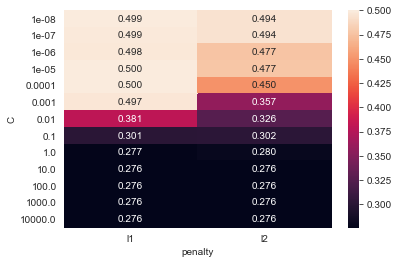

In [15]:
import seaborn as sns; sns.set_style('white')  # plot formatting
# Taking the average of the 5 trials to create 1 heat map based on the averages
heat_results['mean_score_acc'] = heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( heat_results.query('solver=="saga"').pivot('C','penalty','mean_score_acc'),
             annot=True, fmt='.3f')
heat_results

,svm_classifier,C,degree,kernel,gamma,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,SVC(),1.000000e-07,2.0,poly,NaN,0.4792,0.4882,0.4972,0.4988,0.4936,0.4978,0.4982,0.4910,0.4840,0.4932,0.49212
1,SVC(),1.000000e-07,3.0,poly,NaN,0.4792,0.4882,0.4972,0.4988,0.4936,0.4978,0.4982,0.4910,0.4840,0.4932,0.49212
2,SVC(),1.000000e-06,2.0,poly,NaN,0.4792,0.4882,0.4972,0.4988,0.4936,0.4978,0.4982,0.4910,0.4840,0.4932,0.49212
3,SVC(),1.000000e-06,3.0,poly,NaN,0.4792,0.4882,0.4972,0.4988,0.4936,0.4978,0.4982,0.4910,0.4840,0.4932,0.49212
4,SVC(),1.000000e-05,2.0,poly,NaN,0.4792,0.4882,0.4972,0.4988,0.4936,0.4978,0.4982,0.4910,0.4840,0.4932,0.49212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,"SVC(C=100.0, gamma=2)",1.000000e+03,NaN,rbf,0.05,0.1494,0.1548,0.1590,0.1530,0.1574,0.1676,0.1576,0.1530,0.1516,0.1562,0.15596
117,"SVC(C=100.0, gamma=2)",1.000000e+03,NaN,rbf,0.10,0.1280,0.1314,0.1396,0.1278,0.1400,0.1390,0.1392,0.1290,0.1318,0.1268,0.13326
118,"SVC(C=100.0, gamma=2)",1.000000e+03,NaN,rbf,0.50,0.0754,0.0812,0.0716,0.0726,0.0834,0.0768,0.0744,0.0764,0.0784,0.0766,0.07668
119,"SVC(C=100.0, gamma=2)",1.000000e+03,NaN,rbf,1.00,0.0700,0.0724,0.0694,0.0660,0.0704,0.0686,0.0674,0.0700,0.0686,0.0702,0.06930


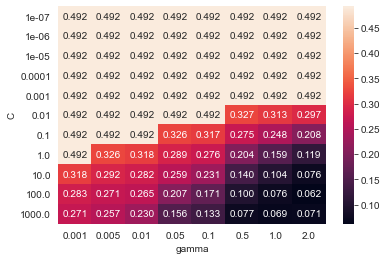

In [16]:
svm_heat_results['mean_score_acc'] = svm_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( svm_heat_results.query('kernel=="rbf"').pivot('C','gamma','mean_score_acc'),
             annot=True, fmt='.3f')
svm_heat_results

,knn_classifier,metric,n_neighbors,weights,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,1,uniform,0.0532,0.0480,0.0528,0.0502,0.0450,0.0534,0.0502,0.0530,0.0496,0.0520,0.05074
1,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,1,distance,0.0532,0.0480,0.0528,0.0502,0.0450,0.0534,0.0502,0.0530,0.0496,0.0520,0.05074
2,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,5,uniform,0.0686,0.0652,0.0634,0.0636,0.0674,0.0652,0.0660,0.0708,0.0580,0.0650,0.06532
3,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,5,distance,0.0656,0.0614,0.0612,0.0612,0.0654,0.0630,0.0644,0.0676,0.0564,0.0624,0.06286
4,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,9,uniform,0.0810,0.0806,0.0768,0.0766,0.0838,0.0782,0.0826,0.0824,0.0700,0.0774,0.07894
5,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,9,distance,0.0730,0.0698,0.0686,0.0690,0.0744,0.0686,0.0756,0.0746,0.0650,0.0696,0.07082
6,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,13,uniform,0.0934,0.0912,0.0922,0.0926,0.0980,0.0926,0.0930,0.0942,0.0814,0.0860,0.09146
7,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,13,distance,0.0804,0.0778,0.0786,0.0796,0.0862,0.0784,0.0826,0.0800,0.0692,0.0744,0.07872
8,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,17,uniform,0.1058,0.1012,0.1038,0.1038,0.1076,0.1080,0.1022,0.1068,0.0924,0.0982,0.10298
9,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,17,distance,0.0882,0.0864,0.0878,0.0886,0.0906,0.0862,0.0856,0.0920,0.0766,0.0820,0.08640


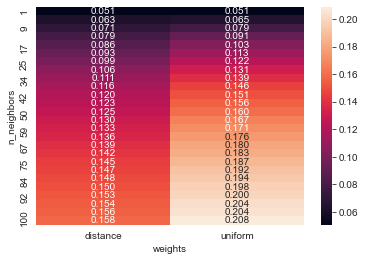

In [17]:
knn_heat_results['mean_score_acc'] = knn_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( knn_heat_results.pivot('n_neighbors','weights','mean_score_acc'),
             annot=True, fmt='.3f')
knn_heat_results

,dt_classifier,ccp_alpha,criterion,max_depth,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,DecisionTreeClassifier(max_depth=5),0.000,gini,1,0.3334,0.3330,0.3410,0.3218,0.3370,0.3340,0.3448,0.3324,0.3334,0.3314,0.33422
1,DecisionTreeClassifier(max_depth=5),0.000,gini,2,0.3094,0.3160,0.3150,0.3062,0.3098,0.3132,0.3398,0.3092,0.3056,0.3084,0.31326
2,DecisionTreeClassifier(max_depth=5),0.000,gini,3,0.3058,0.2890,0.2990,0.3084,0.3132,0.2940,0.3108,0.3114,0.3012,0.3016,0.30344
3,DecisionTreeClassifier(max_depth=5),0.000,gini,4,0.2532,0.2532,0.2672,0.2670,0.2730,0.2626,0.2728,0.2626,0.2676,0.2722,0.26514
4,DecisionTreeClassifier(max_depth=5),0.000,gini,5,0.2178,0.2318,0.2482,0.2424,0.2506,0.2508,0.2476,0.2478,0.2426,0.2566,0.24362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,DecisionTreeClassifier(max_depth=5),0.035,gini,5,0.3334,0.3330,0.3410,0.3218,0.3370,0.3340,0.3448,0.3324,0.3334,0.3314,0.33422
113,DecisionTreeClassifier(max_depth=5),0.035,gini,6,0.3334,0.3330,0.3410,0.3218,0.3370,0.3340,0.3448,0.3324,0.3334,0.3314,0.33422
114,DecisionTreeClassifier(max_depth=5),0.035,gini,7,0.3334,0.3330,0.3410,0.3218,0.3370,0.3340,0.3448,0.3324,0.3334,0.3314,0.33422
115,DecisionTreeClassifier(max_depth=5),0.035,gini,8,0.3334,0.3330,0.3410,0.3218,0.3370,0.3340,0.3448,0.3324,0.3334,0.3314,0.33422


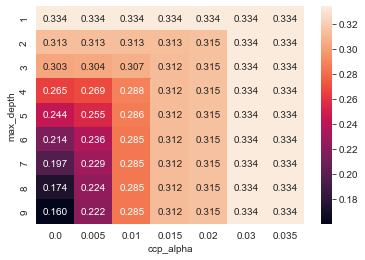

In [18]:
dt_heat_results['mean_score_acc'] = dt_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
dt_cleaned = dt_heat_results.drop_duplicates(['max_depth','ccp_alpha'])
sns.heatmap( dt_cleaned.pivot('max_depth','ccp_alpha','mean_score_acc'),
             annot=True, fmt='.3f')
dt_cleaned

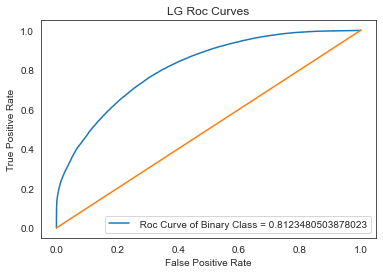

In [19]:
#https://datascience.stackexchange.com/questions/69442/plotting-roc-auc-for-svm-algorithm
from sklearn.metrics import roc_curve, auc
# Concating the list together
lg_Y_test = pd.concat(lg_Y_test_list)
lg_Y_pred = np.concatenate(lg_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(lg_Y_test,lg_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LG Roc Curves")
plt.show()

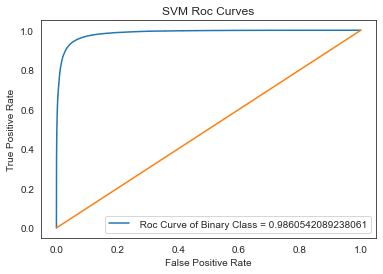

In [20]:
# Concating the list together
svm_Y_test = pd.concat(svm_Y_test_list)
svm_Y_pred = np.concatenate(svm_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(svm_Y_test,svm_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM Roc Curves")
plt.show()

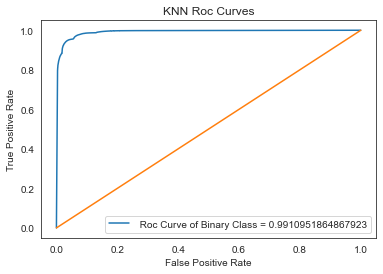

In [21]:
# Concating the list together
knn_Y_test = pd.concat(knn_Y_test_list)
knn_Y_pred = np.concatenate(knn_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(knn_Y_test,knn_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN Roc Curves")
plt.show()

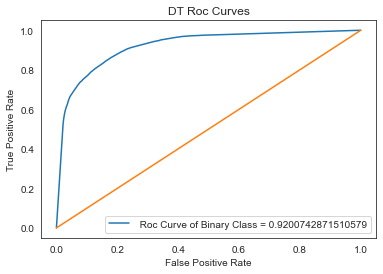

In [22]:
# Concating the list together
dt_Y_test = pd.concat(dt_Y_test_list)
dt_Y_pred = np.concatenate(dt_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(dt_Y_test,dt_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DT Roc Curves")
plt.show()